# Convolutional Neural Network


In [ ]:
# Importing the libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [23]:
tf.__version__


'2.2.0'

# Part 1 - Data Preprocessing


In [3]:

# Preprocessing the Training set
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [4]:
training_set = train_datagen.flow_from_directory('image_classification/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

# Preprocessing the Test set
val_datagen = ImageDataGenerator(rescale = 1./255)
val_set = val_datagen.flow_from_directory('image_classification/val',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 6002 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [5]:

from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2
from PIL import Image
import numpy as np
from tensorflow.keras.preprocessing import image

# Part 2 - Building the CNN

In [6]:

# Initialising the CNN
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=64,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=[64, 64, 3]))

# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Step 5 - Output Layer
#cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
## For Binary Classification
cnn.add(Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation
             ='linear'))

In [7]:
cnn.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               262272    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

# Part 3 - Training the CNN


In [8]:

# Compiling the CNN
cnn.compile(optimizer = 'adam', loss = 'hinge', metrics = ['accuracy'])

# Training the CNN on the Training set and evaluating it on the Test set
r=cnn.fit(x = training_set, validation_data = val_set, epochs = 30)

Epoch 1/30
188/188 [==============================] - 23s 122ms/step - loss: 0.9543 - accuracy: 0.5347 - val_loss: 0.8265 - val_accuracy: 0.6595
Epoch 2/30
188/188 [==============================] - 22s 115ms/step - loss: 0.7622 - accuracy: 0.6461 - val_loss: 0.8501 - val_accuracy: 0.6730
Epoch 3/30
188/188 [==============================] - 21s 113ms/step - loss: 0.7083 - accuracy: 0.6678 - val_loss: 0.6756 - val_accuracy: 0.7045
Epoch 4/30
188/188 [==============================] - 22s 114ms/step - loss: 0.6695 - accuracy: 0.6846 - val_loss: 0.6426 - val_accuracy: 0.6990
Epoch 5/30
188/188 [==============================] - 21s 114ms/step - loss: 0.6282 - accuracy: 0.7091 - val_loss: 0.6598 - val_accuracy: 0.7465
Epoch 6/30
188/188 [==============================] - 21s 114ms/step - loss: 0.6119 - accuracy: 0.7161 - val_loss: 0.5920 - val_accuracy: 0.7330
Epoch 7/30
188/188 [==============================] - 21s 114ms/step - loss: 0.5916 - accuracy: 0.7258 - val_loss: 0.5725 - val_ac

# visualizing the loss and accuracy


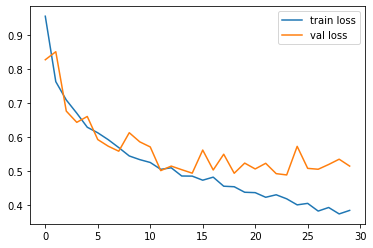

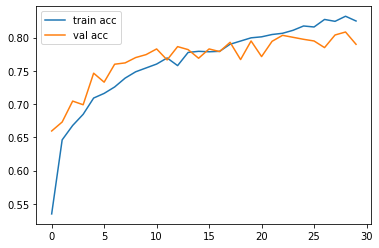

<Figure size 432x288 with 0 Axes>

In [9]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

# saving and loading model



In [10]:

from tensorflow.keras.models import load_model

cnn.save('model_rcat_dog.h5')

In [27]:
from tensorflow.keras.models import load_model
 
# load model
model = load_model('model_rcat_dog.h5')

# Part 4 - Making a single prediction


In [24]:
test_image = image.load_img('image_classification/test/269.jpg', target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)

In [25]:
result

array([[1.0308762]], dtype=float32)

In [26]:
if result[0]<0:
    print("The image classified is cat")
else:
    print("The image classified is dog")

The image classified is dog
